Chapter 10

# 二元高斯分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码生成了二维正态分布的联合概率密度函数 (PDF) 的图像，并从多个角度进行可视化，以展示其形状和等高线分布。

### 1. 参数设定与网格生成
- 首先定义正态分布的相关参数，包括两个随机变量 $X$ 和 $Y$ 的均值 ($\mu_X=0$ 和 $\mu_Y=0$) 和标准差 ($\sigma_X=1$ 和 $\sigma_Y=2$)。
- 使用相关系数 $\rho=0.75$ 构建协方差矩阵：
  $$
  \Sigma = \begin{bmatrix} \sigma_X^2 & \rho \sigma_X \sigma_Y \\ \rho \sigma_X \sigma_Y & \sigma_Y^2 \end{bmatrix}
  $$
- 生成 $X$ 和 $Y$ 的范围以及对应的网格 $XX$ 和 $YY$，用于绘制二维分布。

### 2. 计算联合概率密度函数
- 使用多元正态分布的概率密度函数生成联合密度表面 $f_{X,Y}(x,y)$。其公式为：
  $$
  f_{X,Y}(x, y) = \frac{1}{2\pi \sigma_X \sigma_Y \sqrt{1 - \rho^2}} \exp\left( -\frac{1}{2(1 - \rho^2)} \left( \frac{x^2}{\sigma_X^2} + \frac{y^2}{\sigma_Y^2} - \frac{2 \rho x y}{\sigma_X \sigma_Y} \right) \right)
  $$

### 3. 3D 图像展示联合密度表面
- 使用 `plot_wireframe` 函数在 3D 空间中绘制联合密度函数的网格表面图，并设定投影类型为正交，调整视角以便观察。
- 将 $f_{X,Y}(x,y)$ 绘制为三维曲面，分别设置 $x$ 轴、$y$ 轴和 $z$ 轴的标签。

### 4. 在 X-Z 平面上的投影
- 使用 `contour` 函数，将联合密度函数投影至 X-Z 平面，以展示密度沿 $x$ 轴的分布。投影显示了在不同 $x$ 值下的联合密度变化情况。

### 5. 在 Y-Z 平面上的投影
- 类似地，将联合密度函数投影至 Y-Z 平面。此处展示了 $y$ 值变化情况下的密度分布曲线，清晰地显示了密度在不同 $y$ 值上的行为。

### 6. 在 X-Y 平面上的投影
- 将联合密度函数的轮廓等高线投影到 X-Y 平面，以展示不同高度的密度区域。
- 使用 `contour3D` 函数绘制填充等高线图，为 $X$ 和 $Y$ 的联合分布提供直观的平面表示。

### 7. 填充等高线图
- 最后，生成二维的填充等高线图，其中每条等高线对应联合密度的某一水平。添加中心位置的垂直和水平参考线，显示出分布的均值位置。

总体而言，该代码通过多角度展示二维正态分布的联合概率密度函数，帮助我们理解正态分布随两个变量的不同变化。

这段代码用于可视化二维正态分布的联合概率密度函数。通过设置均值、标准差和相关系数，代码生成了该分布的密度图和三维等高线图，展示了不同方向上的联合分布特性。不同的视角和投影展示了 $X$ 和 $Y$ 的条件关系及其分布形态。

### 联合分布密度函数
二维正态分布的联合密度函数 $f_{X,Y}(x,y)$ 表示为：
$$
f_{X,Y}(x,y) = \frac{1}{2\pi \sigma_X \sigma_Y \sqrt{1 - \rho^2}} \exp \left( -\frac{1}{2(1 - \rho^2)} \left( \frac{(x - \mu_X)^2}{\sigma_X^2} - 2\rho \frac{(x - \mu_X)(y - \mu_Y)}{\sigma_X \sigma_Y} + \frac{(y - \mu_Y)^2}{\sigma_Y^2} \right) \right)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import cm  # 导入颜色映射

## 设置参数

In [2]:
rho     = 0.75  # 设置相关系数
sigma_X = 1     # 设置 X 的标准差
sigma_Y = 2     # 设置 Y 的标准差
mu_X = 0        # 设置 X 的均值
mu_Y = 0        # 设置 Y 的均值

In [3]:
mu    = [mu_X, mu_Y]  # 定义均值向量
Sigma = [[sigma_X**2, sigma_X*sigma_Y*rho],  # 定义协方差矩阵
        [sigma_X*sigma_Y*rho, sigma_Y**2]]

## 准备数据

In [4]:
width = 4  # 设置绘图范围
X = np.linspace(-width, width, 321)  # 创建 X 的线性空间
Y = np.linspace(-width, width, 321)  # 创建 Y 的线性空间

In [5]:
XX, YY = np.meshgrid(X, Y)  # 创建网格数据

In [6]:
XXYY = np.dstack((XX, YY))  # 组合 X 和 Y 的网格
bi_norm = multivariate_normal(mu, Sigma)  # 创建二维正态分布对象

## 可视化联合概率密度函数的曲面

In [7]:
f_X_Y_joint = bi_norm.pdf(XXYY)  # 计算联合分布的概率密度

## 3D 可视化

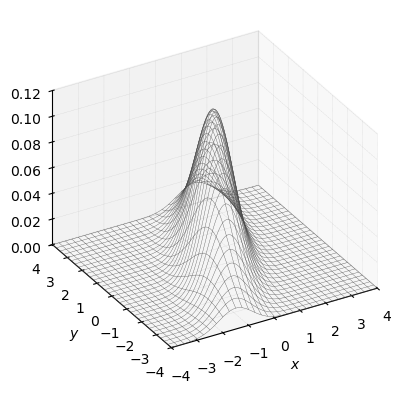

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(XX,YY, f_X_Y_joint,
                  rstride=10, cstride=10,
                  color = [0.3,0.3,0.3],
                  linewidth = 0.25)  # 绘制3D网格图

ax.set_xlabel(r'$x$')  # 设置 X 轴标签
ax.set_ylabel(r'$y$')  # 设置 Y 轴标签
ax.set_zlabel(r'$f_{X,Y}(x,y)$')  # 设置 Z 轴标签
ax.set_proj_type('ortho')  # 设置正交投影
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(-width, width)  # 设置 Y 轴范围
ax.set_zlim(f_X_Y_joint.min(), f_X_Y_joint.max())  # 设置 Z 轴范围
ax.view_init(azim=-120, elev=30)  # 设置视角

## 沿 Y 投影到 X-Z 平面

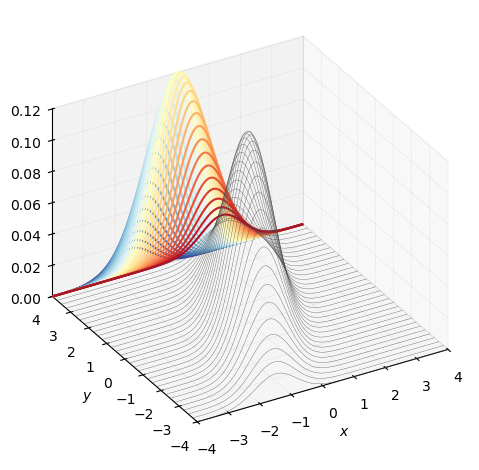

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')  # 创建3D子图

ax.plot_wireframe(XX, YY, f_X_Y_joint, rstride=10, cstride=0,
                  color = [0.3,0.3,0.3],
                  linewidth = 0.25)  # 绘制网格图

ax.contour(XX, YY, f_X_Y_joint, 
           levels = 33, zdir='y', \
            offset=XX.max(), cmap=cm.RdYlBu_r)  # 绘制投影轮廓

ax.set_xlabel(r'$x$')  # 设置 X 轴标签
ax.set_ylabel(r'$y$')  # 设置 Y 轴标签
ax.set_zlabel(r'$f_{X,Y}(x,y)$')  # 设置 Z 轴标签
ax.set_proj_type('ortho')  # 设置正交投影
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(-width, width)  # 设置 Y 轴范围
ax.set_zlim(f_X_Y_joint.min(),f_X_Y_joint.max())  # 设置 Z 轴范围
ax.view_init(azim=-120, elev=30)  # 设置视角
plt.tight_layout()  # 调整布局
plt.show()  # 显示图形

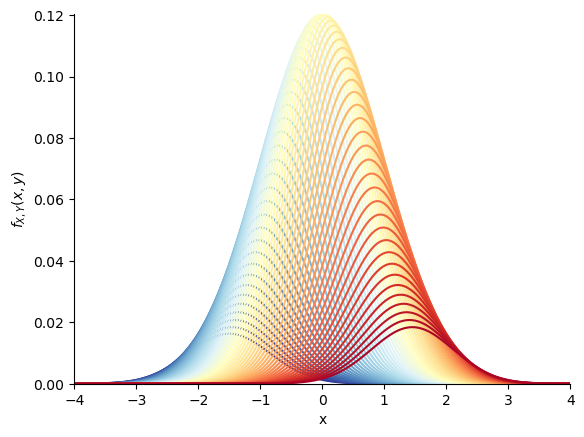

In [10]:
fig, ax = plt.subplots()  # 创建子图

colors = plt.cm.RdYlBu_r(np.linspace(0,1,len(X)))  # 设置颜色渐变

for i in np.arange(1, len(X), 5):  # 遍历 X 的取值
    plt.plot(X, f_X_Y_joint[int(i)-1, :],
             color = colors[int(i)-1])  # 绘制条件分布

plt.xlabel('x')  # 设置 X 轴标签
plt.ylabel(r'$f_{X,Y}(x,y)$')  # 设置 Y 轴标签
ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(0, f_X_Y_joint.max())  # 设置 Y 轴范围
ax.spines['top'].set_visible(False)  # 隐藏上边框
ax.spines['right'].set_visible(False)  # 隐藏右边框

## 沿 Y 投影到 Y-Z 平面

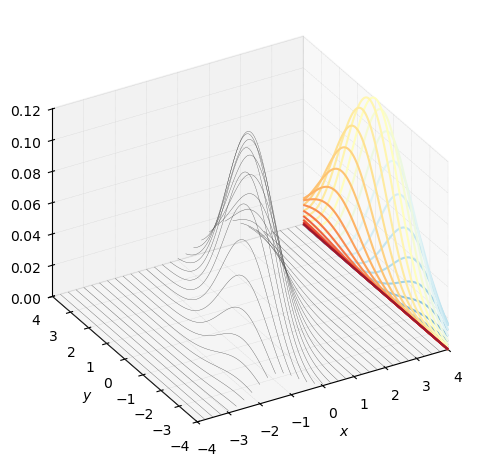

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')  # 创建3D子图

ax.plot_wireframe(XX, YY, f_X_Y_joint, rstride=0, cstride=10,
                  color = [0.3,0.3,0.3],
                  linewidth = 0.25)  # 绘制网格图

ax.contour(XX, YY, f_X_Y_joint, 
           levels = 33, zdir='x', \
            offset=YY.max(), cmap=cm.RdYlBu_r)  # 绘制投影轮廓

ax.set_xlabel(r'$x$')  # 设置 X 轴标签
ax.set_ylabel(r'$y$')  # 设置 Y 轴标签
ax.set_zlabel(r'$f_{X,Y}(x,y)$')  # 设置 Z 轴标签
ax.set_proj_type('ortho')  # 设置正交投影
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(-width, width)  # 设置 Y 轴范围
ax.set_zlim(f_X_Y_joint.min(), f_X_Y_joint.max())  # 设置 Z 轴范围
ax.view_init(azim=-120, elev=30)  # 设置视角
plt.tight_layout()  # 调整布局
plt.show()  # 显示图形

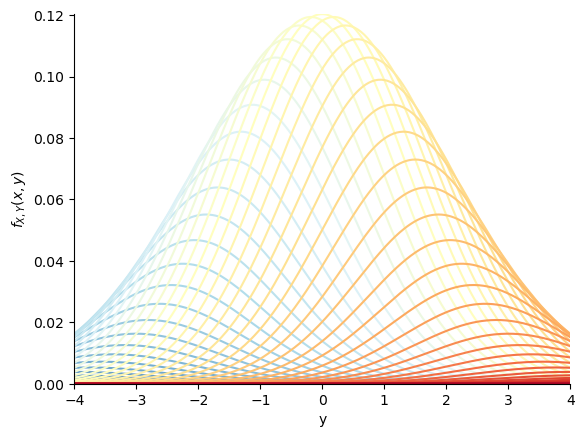

In [12]:
fig, ax = plt.subplots()  # 创建子图

colors = plt.cm.RdYlBu_r(np.linspace(0,1,len(Y)))  # 设置颜色渐变

for i in np.arange(1, len(X), 5):  # 遍历 X 的取值
    plt.plot(X, f_X_Y_joint[:, int(i)-1],
             color = colors[int(i)-1])  # 绘制条件分布

plt.xlabel('y')  # 设置 Y 轴标签
plt.ylabel(r'$f_{X,Y}(x,y)$')  # 设置 Z 轴标签
ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(0, f_X_Y_joint.max())  # 设置 Z 轴范围
ax.spines['top'].set_visible(False)  # 隐藏上边框
ax.spines['right'].set_visible(False)  # 隐藏右边框

## 沿 Z 投影到 X-Y 平面

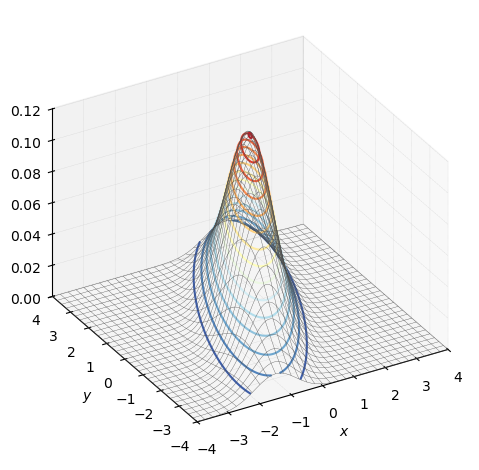

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')  # 创建3D子图

ax.plot_wireframe(XX, YY, f_X_Y_joint,
                  rstride=10, cstride=10,
                  color = [0.3,0.3,0.3],
                  linewidth = 0.25)  # 绘制网格图

ax.contour3D(XX,YY, f_X_Y_joint,15,
             cmap = 'RdYlBu_r')  # 绘制3D轮廓图

ax.set_xlabel(r'$x$')  # 设置 X 轴标签
ax.set_ylabel(r'$y$')  # 设置 Y 轴标签
ax.set_zlabel(r'$f_{X,Y}(x,y)$')  # 设置 Z 轴标签
ax.view_init(azim=-120, elev=30)  # 设置视角
ax.set_proj_type('ortho')  # 设置正交投影
ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 X 轴网格
ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Y 轴网格
ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "linestyle" : ":"})  # 调整 Z 轴网格

ax.set_xlim(-width, width)  # 设置 X 轴范围
ax.set_ylim(-width, width)  # 设置 Y 轴范围
ax.set_zlim(f_X_Y_joint.min(),f_X_Y_joint.max())  # 设置 Z 轴范围
plt.tight_layout()  # 调整布局
plt.show()  # 显示图形

## 绘制填充轮廓图

Text(0, 0.5, '$y$')

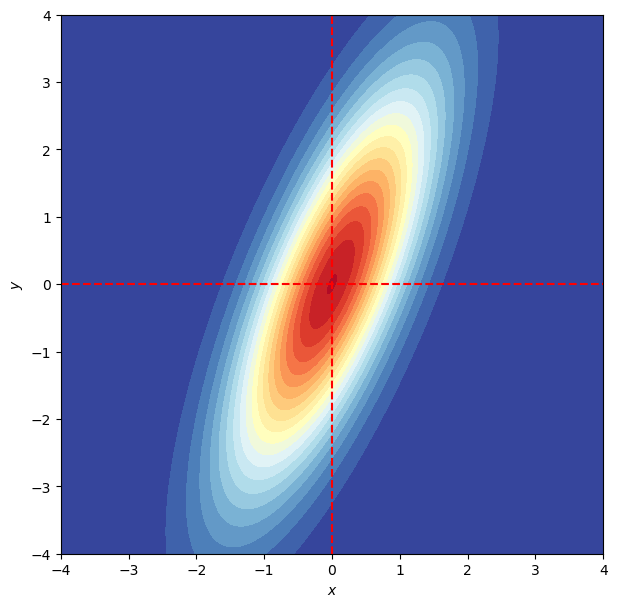

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))  # 创建图形和坐标轴

plt.contourf(XX, YY, f_X_Y_joint, 20, cmap=cm.RdYlBu_r)  # 绘制填充轮廓
plt.axvline(x = mu_X, color = 'r', linestyle = '--')  # 绘制垂直参考线
plt.axhline(y = mu_Y, color = 'r', linestyle = '--')  # 绘制水平参考线

ax.set_xlabel(r'$x$')  # 设置 X 轴标签
ax.set_ylabel(r'$y$')  # 设置 Y 轴标签